In [55]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(0)

In [56]:
data_dir = Path("../../../Datasets/Arduino_dataset/") 

In [57]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [58]:
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x


def change(df4: pd.DataFrame):
    for index, row in df4.iterrows():
        if row['frequency'] != "airflow(m/s)":
            if float(row['frequency']) > 500:
                df4.drop(index, inplace=True)
    return df4

In [59]:


df29 = pd.read_csv(data_dir / "different_distances/Vent1_2_5m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()
df29 = change(df29)
df29 = convert(df29)

df30 = pd.read_csv(data_dir / "no_air/noair.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()
df30 = change(df30)
df30 = convert(df30)

df31 = pd.read_csv(data_dir / "different_distances/Vent1_on_vent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()
df31 = change(df31)
df31 = convert(df31)

In [60]:

df32 = pd.read_csv(data_dir / "different_distances/vent1_1m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()
df32 = change(df32)
df32 = convert(df32)
dftest1 = df32[-50:]
df32 = df32[-50:]


df34 = pd.read_csv(data_dir / "different_distances/vent1_50cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
df34 = change(df34)
df34 = convert(df34)
dftest0_5 = df34[-50:]
df34 = df34[:-50]


df35 = pd.read_csv(data_dir / "different_distances/vent1_150cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
df35 = change(df35)
df35 = convert(df35)

df36 = pd.read_csv(data_dir / "different_distances/vent1_2m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df36 = df36[df36['frequency'] != "clocktime"]
df36 = df36.dropna()
df36 = convert(df36)

In [61]:

# df38 = pd.read_csv(data_dir / "different_distances/1m_vent1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df38 = df38[df38['frequency'] != "clocktime"]
# df38 = df38.dropna()
# df38 = convert(df38)
# # dftest1 = df38[-50:]
# # df38 = df38[-50:]


# df39 = pd.read_csv(data_dir / "different_distances/50cm_vent1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df39 = df39[df39['frequency'] != "clocktime"]
# df39 = df39.dropna()
# df39 = convert(df39)
# # dftest0_5 = df39[-50:]
# # df39 = df39[-50:]




In [62]:


df42 = pd.read_csv(data_dir / "no_air/noair.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df42 = df42[df42['frequency'] != "clocktime"]
df42 = df42.dropna()
df42 = convert(df42)


df43 = pd.read_csv(data_dir / "mix_data/new1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df43 = df43[df43['frequency'] != "clocktime"]
df43 = df43.dropna()
df43 = convert(df43)
# dftest1 = df43[-50:]
# df43 = df43[-50:]

In [63]:


df = np.concatenate([ df32, df34, df35, df36, df29, df31 ])
df2 = np.concatenate([df42])

In [64]:
df.shape

(2143, 10)

In [65]:
df2.shape

(3415, 10)

In [66]:
data = df


In [67]:
X1 = data[:,:-1]

X1 = X1[:, :7]
X1.shape

(2143, 7)

In [68]:
y1 =  np.ones(X1.shape[0], dtype=int)

# y = data[:, -1]
y1.shape


(2143,)

In [69]:
X2 = df2[:,:-1]

X2 = X2[:, :7]
X2.shape

y2 =  np.zeros(X2.shape[0], dtype=int)

# y = data[:, -1]
y2.shape




(3415,)

In [70]:
X = np.concatenate([X1,X2])
y = np.concatenate([y1,y2])

In [71]:
print (X.shape, y.shape)

        

(5558, 7) (5558,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [74]:
from joblib import dump, load
dump(clf, "flowSense_classifier.joblib")

['flowSense_classifier.joblib']

In [75]:
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [76]:
print(y_pred[:5])
print(y_test[:5])

[1 0 1 1 1]
[1 0 1 1 1]


In [77]:
print(y_train_pred[:5])
print(y_train[:5])

[1 0 1 0 1]
[1 0 1 0 1]


In [78]:

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

print ("For test set:")
# Confusion Matrix
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Recall
print("Recall: ", recall_score(y_test, y_pred, average=None))

# Precision
print("Precision: ",precision_score(y_test, y_pred, average=None))

#F1
print("F1 Score: ",f1_score(y_test, y_pred, average=None))


For test set:
Confusion Matrix:  [[672   4]
 [ 12 424]]
Accuracy Score:  0.9856115107913669
Recall:  [0.99408284 0.97247706]
Precision:  [0.98245614 0.99065421]
F1 Score:  [0.98823529 0.98148148]


In [79]:
print ("For train set:")
# Confusion Matrix
print("Confusion Matrix: ",confusion_matrix(y_train, y_train_pred))

# Accuracy
print("Accuracy Score: ", accuracy_score(y_train, y_train_pred))

# Recall
print("Recall: ", recall_score(y_train, y_train_pred, average=None))

# Precision
print("Precision: ",precision_score(y_train, y_train_pred, average=None))

#F1
print("F1 Score: ",f1_score(y_train, y_train_pred, average=None))


For train set:
Confusion Matrix:  [[2720   19]
 [  19 1688]]
Accuracy Score:  0.9914529914529915
Recall:  [0.99306316 0.98886936]
Precision:  [0.99306316 0.98886936]
F1 Score:  [0.99306316 0.98886936]


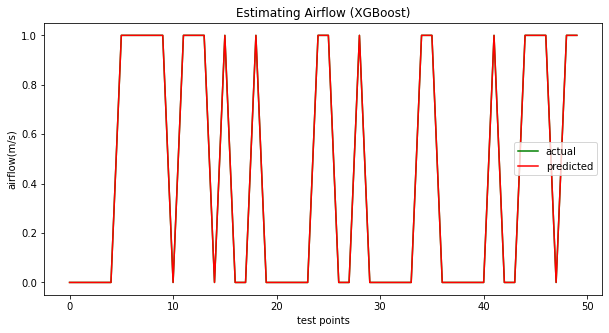

In [80]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

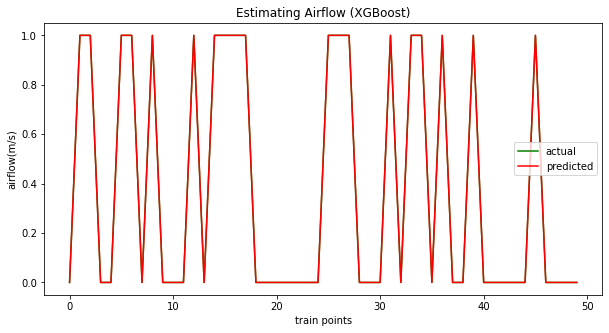

In [81]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")

